# Bias and fairness audit
This notebook executes a bias and fairness autdit for the High salary classifier model using Aequitas  
For a full overview of how to interpret these results see [Link](https://github.com/dssg/aequitas/blob/master/docs/source/examples/compas_demo.ipynb)

In [13]:
import pandas as pd
import os
import seaborn as sns

from aequitas.plotting import Plot
from aequitas.group import Group
from aequitas.bias import Bias
from aequitas.fairness import Fairness

from sklearn.model_selection import train_test_split

from ml.data import load_data, process_data
from ml.model import load_model_artifacts, inference

%matplotlib inline

# Enable Pandas to display dataframes without restriction.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Import 

### Development data

In [14]:
data = load_data(os.path.join(os.getcwd(), "raw_data", "census.csv"))
data.head(5)

,age,workclass,fnlgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Model artifacts

In [15]:
rf_model, encoder, lb = load_model_artifacts(os.path.join(os.getcwd(),"model_artifacts"))

# Preprocess the data 

In [16]:
# Split into train and test, as we seed the random number generate, the samples will be consistent
train, test = train_test_split(data, test_size=0.20, random_state = 831)

# Reset the indicies for consistent merging
train.reset_index(drop = True, inplace = True)
test.reset_index(drop = True, inplace = True)

In [17]:
# Transform the test data
cat_features = [
    "workclass",
    "education",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "native-country"
]

X_test, y_test, encoder, lb = process_data(
        test, categorical_features=cat_features, label="salary", training=False, encoder = encoder, lb = lb
)

In [18]:
# Get the predictions for the test dataset
y_test_preds = inference(rf_model, X_test)

# Create the Aequitas input dataframe
As per the slice analysis, for expediancy just run for categorical features

In [19]:
df_aq = test[cat_features + ['salary']].copy(deep = True)
df_aq['label_value'] = df_aq['salary'].apply(lambda x: 0 if x == "<=50K" else 1)
df_aq['score'] = pd.Series(y_test_preds)
df_aq.pop('salary')
df_aq.head(50)

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,label_value,score
0,Private,HS-grad,Never-married,Craft-repair,Not-in-family,White,Male,United-States,0,0
1,Private,Bachelors,Never-married,Sales,Not-in-family,White,Male,United-States,0,0
2,Private,Bachelors,Never-married,Handlers-cleaners,Not-in-family,White,Male,United-States,0,0
3,Self-emp-inc,Some-college,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,China,0,0
4,Federal-gov,Some-college,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,0,0
5,Private,Some-college,Separated,Tech-support,Unmarried,White,Female,Columbia,0,0
6,Private,Some-college,Married-spouse-absent,Adm-clerical,Unmarried,White,Female,United-States,0,0
7,Private,Some-college,Never-married,Adm-clerical,Other-relative,Black,Female,Jamaica,0,0
8,Private,Some-college,Married-civ-spouse,Other-service,Wife,White,Female,United-States,0,0
9,Private,10th,Married-spouse-absent,Adm-clerical,Unmarried,White,Female,Mexico,0,0


# Run the Aequitas analyis

In [20]:
# Get the group dataset
group = Group()
xtab, idxs = group.get_crosstabs(df_aq)
xtab

,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,pp,pn,ppr,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev
0,0,binary 0/1,838,workclass,?,0.282051,0.985507,0.076087,0.312500,0.014493,0.717949,0.923913,0.687500,16,368,0.019093,0.041667,5,28,340,11,39,345,384,6513,0.101562
1,0,binary 0/1,838,workclass,Federal-gov,0.384615,0.948276,0.266667,0.193548,0.051724,0.615385,0.733333,0.806452,31,150,0.036993,0.171271,6,40,110,25,65,116,181,6513,0.359116
2,0,binary 0/1,838,workclass,Local-gov,0.455882,0.962585,0.207283,0.150685,0.037415,0.544118,0.792717,0.849315,73,357,0.087112,0.169767,11,74,283,62,136,294,430,6513,0.316279
3,0,binary 0/1,838,workclass,Never-worked,NaN,1.000000,0.000000,NaN,0.000000,NaN,1.000000,NaN,0,1,0.000000,0.000000,0,0,1,0,0,1,1,6513,0.000000
4,0,binary 0/1,838,workclass,Private,0.419291,0.978181,0.145967,0.153082,0.021819,0.580709,0.854033,0.846918,503,4042,0.600239,0.110671,77,590,3452,426,1016,3529,4545,6513,0.223542
5,0,binary 0/1,838,workclass,Self-emp-inc,0.504425,0.896907,0.391608,0.149254,0.103093,0.495575,0.608392,0.850746,67,143,0.079952,0.319048,10,56,87,57,113,97,210,6513,0.538095
6,0,binary 0/1,838,workclass,Self-emp-not-inc,0.496241,0.929775,0.168342,0.274725,0.070225,0.503759,0.831658,0.725275,91,398,0.108592,0.186094,25,67,331,66,133,356,489,6513,0.271984
7,0,binary 0/1,838,workclass,State-gov,0.620253,0.958115,0.140845,0.140351,0.041885,0.379747,0.859155,0.859649,57,213,0.068019,0.211111,8,30,183,49,79,191,270,6513,0.292593
8,0,binary 0/1,838,workclass,Without-pay,NaN,1.000000,0.000000,NaN,0.000000,NaN,1.000000,NaN,0,3,0.000000,0.000000,0,0,3,0,0,3,3,6513,0.000000
9,0,binary 0/1,838,education,10th,0.000000,1.000000,0.054726,NaN,0.000000,1.000000,0.945274,NaN,0,201,0.000000,0.000000,0,11,190,0,11,190,201,6513,0.054726


In [21]:
# Get the bias dataset
bias = Bias()
bias_df = bias.get_disparity_major_group(xtab, 
                                         original_df=df_aq, 
                                         alpha=0.05, 
                                         mask_significance=True)
bias_df

get_disparity_major_group()


,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,pp,pn,ppr,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity,ppr_ref_group_value,pprev_ref_group_value,precision_ref_group_value,fdr_ref_group_value,for_ref_group_value,fpr_ref_group_value,fnr_ref_group_value,tpr_ref_group_value,tnr_ref_group_value,npv_ref_group_value
0,0,binary 0/1,838,workclass,?,0.282051,0.985507,0.076087,0.312500,0.014493,0.717949,0.923913,0.687500,16,368,0.019093,0.041667,5,28,340,11,39,345,384,6513,0.101562,0.031809,0.376491,0.811766,2.041396,0.521260,0.664220,1.236332,0.672686,1.007490,1.081824,Private,Private,Private,Private,Private,Private,Private,Private,Private,Private
1,0,binary 0/1,838,workclass,Federal-gov,0.384615,0.948276,0.266667,0.193548,0.051724,0.615385,0.733333,0.806452,31,150,0.036993,0.171271,6,40,110,25,65,116,181,6513,0.359116,0.061630,1.547565,0.952219,1.264349,1.826893,2.370578,1.059713,0.917299,0.969428,0.858671,Private,Private,Private,Private,Private,Private,Private,Private,Private,Private
2,0,binary 0/1,838,workclass,Local-gov,0.455882,0.962585,0.207283,0.150685,0.037415,0.544118,0.792717,0.849315,73,357,0.087112,0.169767,11,74,283,62,136,294,430,6513,0.316279,0.145129,1.533982,1.002830,0.984344,1.420064,1.714772,0.936989,1.087269,0.984056,0.928205,Private,Private,Private,Private,Private,Private,Private,Private,Private,Private
3,0,binary 0/1,838,workclass,Never-worked,NaN,1.000000,0.000000,NaN,0.000000,NaN,1.000000,NaN,0,1,0.000000,0.000000,0,0,1,0,0,1,1,6513,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,1.022306,1.170915,Private,Private,Private,Private,Private,Private,Private,Private,Private,Private
4,0,binary 0/1,838,workclass,Private,0.419291,0.978181,0.145967,0.153082,0.021819,0.580709,0.854033,0.846918,503,4042,0.600239,0.110671,77,590,3452,426,1016,3529,4545,6513,0.223542,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,Private,Private,Private,Private,Private,Private,Private,Private,Private,Private
5,0,binary 0/1,838,workclass,Self-emp-inc,0.504425,0.896907,0.391608,0.149254,0.103093,0.495575,0.608392,0.850746,67,143,0.079952,0.319048,10,56,87,57,113,97,210,6513,0.538095,0.133201,2.882846,1.004520,0.974995,2.682849,4.724863,0.853397,1.203041,0.916914,0.712375,Private,Private,Private,Private,Private,Private,Private,Private,Private,Private
6,0,binary 0/1,838,workclass,Self-emp-not-inc,0.496241,0.929775,0.168342,0.274725,0.070225,0.503759,0.831658,0.725275,91,398,0.108592,0.186094,25,67,331,66,133,356,489,6513,0.271984,0.180915,1.681506,0.856369,1.794634,1.153283,3.218481,0.867491,1.183522,0.950515,0.973802,Private,Private,Private,Private,Private,Private,Private,Private,Private,Private
7,0,binary 0/1,838,workclass,State-gov,0.620253,0.958115,0.140845,0.140351,0.041885,0.379747,0.859155,0.859649,57,213,0.068019,0.211111,8,30,183,49,79,191,270,6513,0.292593,0.113320,1.907555,1.015032,0.916838,0.964908,1.919630,0.653937,1.479289,0.979487,1.005998,Private,Private,Private,Private,Private,Private,Private,Private,Private,Private
8,0,binary 0/1,838,workclass,Without-pay,NaN,1.000000,0.000000,NaN,0.000000,NaN,1.000000,NaN,0,3,0.000000,0.000000,0,0,3,0,0,3,3,6513,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,1.022306,1.170915,Private,Private,Private,Private,Private,Private,Private,Private,Private,Private
9,0,binary 0/1,838,education,10th,0.000000,1.000000,0.054726,NaN,0.000000,1.000000,0.945274,NaN,0,201,0.000000,0.000000,0,11,190,0,11,190,201,6513,0.054726,0.000000,0.000000,NaN,NaN,0.389144,0.000000,1.171429,0.000000,1.000584,1.099965,HS-grad,HS-grad,HS-grad,HS-grad,HS-grad,HS-grad,HS-grad,HS-grad,HS-grad,HS-grad


In [22]:
# Get the fairness dataset
fairness = Fairness()
fairness_df = fairness.get_group_value_fairness(bias_df)
fairness_df

,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,pp,pn,ppr,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity,ppr_ref_group_value,pprev_ref_group_value,precision_ref_group_value,fdr_ref_group_value,for_ref_group_value,fpr_ref_group_value,fnr_ref_group_value,tpr_ref_group_value,tnr_ref_group_value,npv_ref_group_value,Statistical Parity,Impact Parity,FDR Parity,FPR Parity,FOR Parity,FNR Parity,TPR Parity,TNR Parity,NPV Parity,Precision Parity,TypeI Parity,TypeII Parity,Equalized Odds,Unsupervised Fairness,Supervised Fairness
0,0,binary 0/1,838,workclass,?,0.282051,0.985507,0.076087,0.312500,0.014493,0.717949,0.923913,0.687500,16,368,0.019093,0.041667,5,28,340,11,39,345,384,6513,0.101562,0.031809,0.376491,0.811766,2.041396,0.521260,0.664220,1.236332,0.672686,1.007490,1.081824,Private,Private,Private,Private,Private,Private,Private,Private,Private,Private,False,False,False,False,False,True,False,True,True,True,False,False,False,False,False
1,0,binary 0/1,838,workclass,Federal-gov,0.384615,0.948276,0.266667,0.193548,0.051724,0.615385,0.733333,0.806452,31,150,0.036993,0.171271,6,40,110,25,65,116,181,6513,0.359116,0.061630,1.547565,0.952219,1.264349,1.826893,2.370578,1.059713,0.917299,0.969428,0.858671,Private,Private,Private,Private,Private,Private,Private,Private,Private,Private,False,False,False,False,False,True,True,True,True,True,False,False,False,False,False
2,0,binary 0/1,838,workclass,Local-gov,0.455882,0.962585,0.207283,0.150685,0.037415,0.544118,0.792717,0.849315,73,357,0.087112,0.169767,11,74,283,62,136,294,430,6513,0.316279,0.145129,1.533982,1.002830,0.984344,1.420064,1.714772,0.936989,1.087269,0.984056,0.928205,Private,Private,Private,Private,Private,Private,Private,Private,Private,Private,False,False,True,False,False,True,True,True,True,True,False,False,False,False,False
3,0,binary 0/1,838,workclass,Never-worked,NaN,1.000000,0.000000,NaN,0.000000,NaN,1.000000,NaN,0,1,0.000000,0.000000,0,0,1,0,0,1,1,6513,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,1.022306,1.170915,Private,Private,Private,Private,Private,Private,Private,Private,Private,Private,False,False,NaN,False,False,NaN,NaN,True,True,NaN,False,False,False,False,False
4,0,binary 0/1,838,workclass,Private,0.419291,0.978181,0.145967,0.153082,0.021819,0.580709,0.854033,0.846918,503,4042,0.600239,0.110671,77,590,3452,426,1016,3529,4545,6513,0.223542,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,Private,Private,Private,Private,Private,Private,Private,Private,Private,Private,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
5,0,binary 0/1,838,workclass,Self-emp-inc,0.504425,0.896907,0.391608,0.149254,0.103093,0.495575,0.608392,0.850746,67,143,0.079952,0.319048,10,56,87,57,113,97,210,6513,0.538095,0.133201,2.882846,1.004520,0.974995,2.682849,4.724863,0.853397,1.203041,0.916914,0.712375,Private,Private,Private,Private,Private,Private,Private,Private,Private,Private,False,False,True,False,False,True,True,True,False,True,False,False,False,False,False
6,0,binary 0/1,838,workclass,Self-emp-not-inc,0.496241,0.929775,0.168342,0.274725,0.070225,0.503759,0.831658,0.725275,91,398,0.108592,0.186094,25,67,331,66,133,356,489,6513,0.271984,0.180915,1.681506,0.856369,1.794634,1.153283,3.218481,0.867491,1.183522,0.950515,0.973802,Private,Private,Private,Private,Private,Private,Private,Private,Private,Private,False,False,False,False,True,True,True,True,True,True,False,True,False,False,False
7,0,binary 0/1,838,workclass,State-gov,0.620253,0.958115,0.140845,0.140351,0.041885,0.379747,0.859155,0.859649,57,213,0.068019,0.211111,8,30,183,49,79,191,270,6513,0.292593,0.113320,1.907555,1.015032,0.916838,0.964908,1.919630,0.653937,1.479289,0.979487,1.005998,Private,Private,Private,Private,Priv

Model is not fair acorss  
* Unsupervised Fairness: Fairness in both Statistical Parity and Impact Parity
    * Statistical parity requires that easch groups is epresented equally 
    * Statistical parity requires that a classifier gives equal probability with respect to a target variable, independent of whether a subject is or is not contained within a protected group
* Supervised Fairness: Fairness in both Type I and Type II Parity
    * Each group has proportionalty equal type 1 (false positive) and type 2 (false negative) rates made by the model
* Overall Fairness: Fairness across all parities for all attributes

In [23]:
# Get overall fairness
overall_fairness = fairness.get_overall_fairness(fairness_df)
print(overall_fairness)

{'Unsupervised Fairness': False, 'Supervised Fairness': False, 'Overall Fairness': False}


# Visualise disparities
False positive - The model predicts the individual **IS** wealthy but they are not  
False negative - The model predicts the individual **IS NOT** weathy but they are 

The model is ...
* 1.27 times more likely to incorrectly predict a black individual has a lower income when compared to a white individual
* 1.65 times more likely to incorrectly predict a female individual has a lower income when compared to a male individual
* generally more likely to incorrectly predict individual from "non-professinal" occupation (i.e. machine operator, service, cleaner) has a lower income when compared to a "prfessoinal" occupation


In [24]:
aqp = Plot()

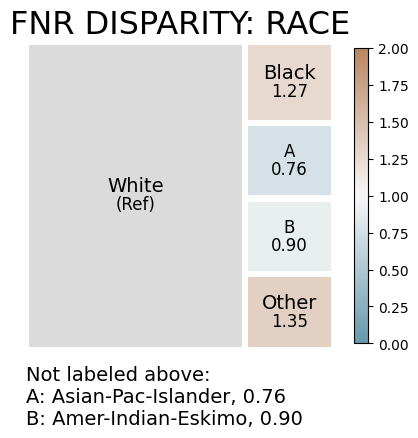

In [25]:
aqp.plot_disparity(bias_df, group_metric='fnr_disparity', attribute_name='race', significance_alpha=0.05)

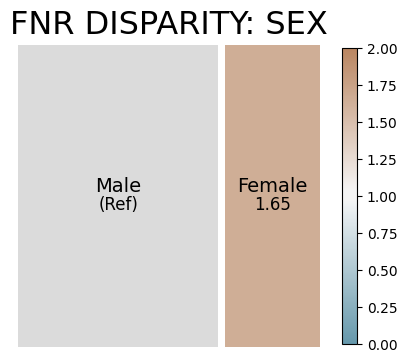

In [26]:
aqp.plot_disparity(bias_df, group_metric='fnr_disparity', attribute_name='sex', significance_alpha=0.05)

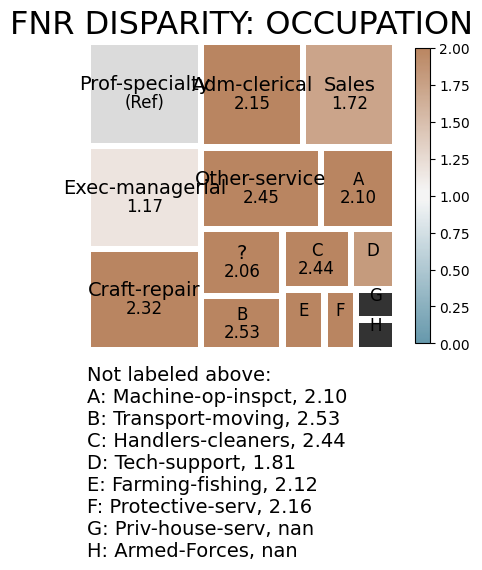

In [27]:
aqp.plot_disparity(bias_df, group_metric='fnr_disparity', attribute_name='occupation', significance_alpha=0.05)